# Sectioning of images

This is a tutorial on sectioning on 3D confocal images. Sectioning is in the z-direction, i.e. layer-wise. 

### Load packages

In [1]:
library(RCon3D)

#### Find the images

In [2]:
img <- findIMG("//a00143.science.domain/cmf483/Documents/PhD/Packages/RCon3D/Data")

## Sectioning

The `xy_splits` function runs an analysis for each xy-position. If we for example sum for each xy-position we will get a biomass distribution across the image. We can also use the function to section the image and then sum. We can for example say that the top is the upper 10 layers for each xy position. Here we say that the upper part is the upper 50% for each xy-position. It is therefore dynamic sectioning that follows the thickness of the specimen.

Sectioning is done for all the channels given as input. 

In [3]:
my.xy.split <- xy_splits(img, channels = c("xan","pan","ste","mic"),
                         do = "section", upper.part = 0.5, layer.start = "Top", cores = 1)

Starting sectioning


  |======================================================================| 100%

The result is a recursive list with matrices of results for each xy-position as elements:

In [4]:
str(my.xy.split)

List of 1
 $ FourSpecies24h_:List of 2
  ..$ Upper:List of 4
  .. ..$ xan: num [1:512, 1:512] 5 10 27 33 31 36 37 32 26 32 ...
  .. ..$ pan: int [1:512, 1:512] 60 51 42 39 36 30 36 21 29 16 ...
  .. ..$ ste: num [1:512, 1:512] 6 9 8 9 10 16 12 23 35 31 ...
  .. ..$ mic: num [1:512, 1:512] 0 2 0 0 0 0 0 1 0 8 ...
  ..$ Lower:List of 4
  .. ..$ xan: num [1:512, 1:512] 0 0 4 9 2 1 0 2 5 3 ...
  .. ..$ pan: int [1:512, 1:512] 60 66 73 74 75 81 70 76 74 78 ...
  .. ..$ ste: num [1:512, 1:512] 11 6 2 0 0 1 16 2 11 7 ...
  .. ..$ mic: num [1:512, 1:512] 0 0 0 0 0 0 0 0 0 0 ...


From the quantification tutorial "xan" appeared to be mainly in the top, lets see if it is consistent with this analysis.

In [5]:
# Upper part
sum(my.xy.split[[1]][["Upper"]][["xan"]])

# Lower part
sum(my.xy.split[[1]][["Lower"]][["xan"]])

[1] 3227707

[1] 324966

10 times more pixels in the upper part than the lower part! Note that the first list denotes the image number `[[1]]`, second list the section `[[Upper]]`, and third list the channel `[["xan]]`. This outputs a matrix in which the position correspond to the xy-coordinate and the value to the sum of pixels in the section

Lets plot heatmaps of the upper and lower sections:

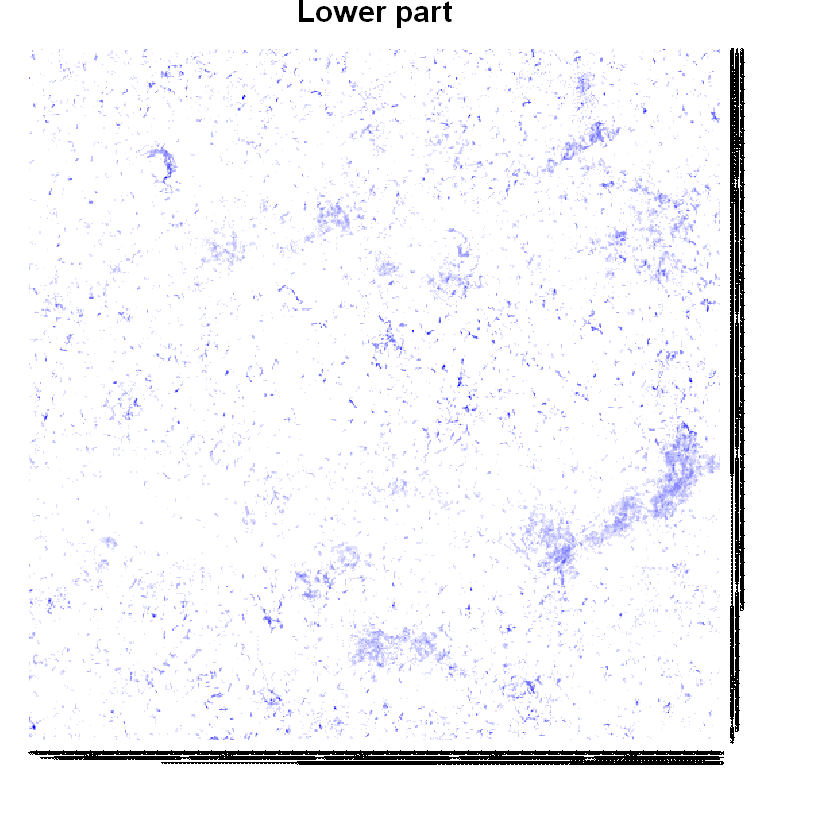

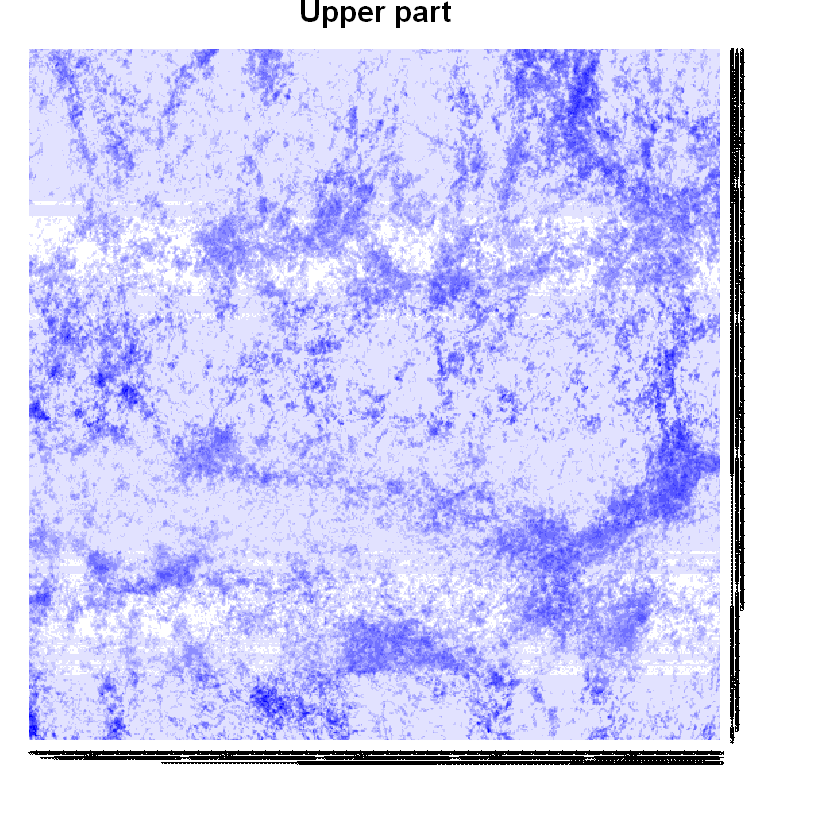

In [6]:
heatmap(my.xy.split[[1]][["Lower"]][["xan"]],Rowv = NA,Colv = NA,main="Lower part",col=colorRampPalette(c("white","blue"))(10))
heatmap(my.xy.split[[1]][["Upper"]][["xan"]],Rowv = NA,Colv = NA,main="Upper part",col=colorRampPalette(c("white","blue"))(10))

## Other uses

We can apply many different functions to the `xy_splits` function

#### Sum "pan" for each xy-position:

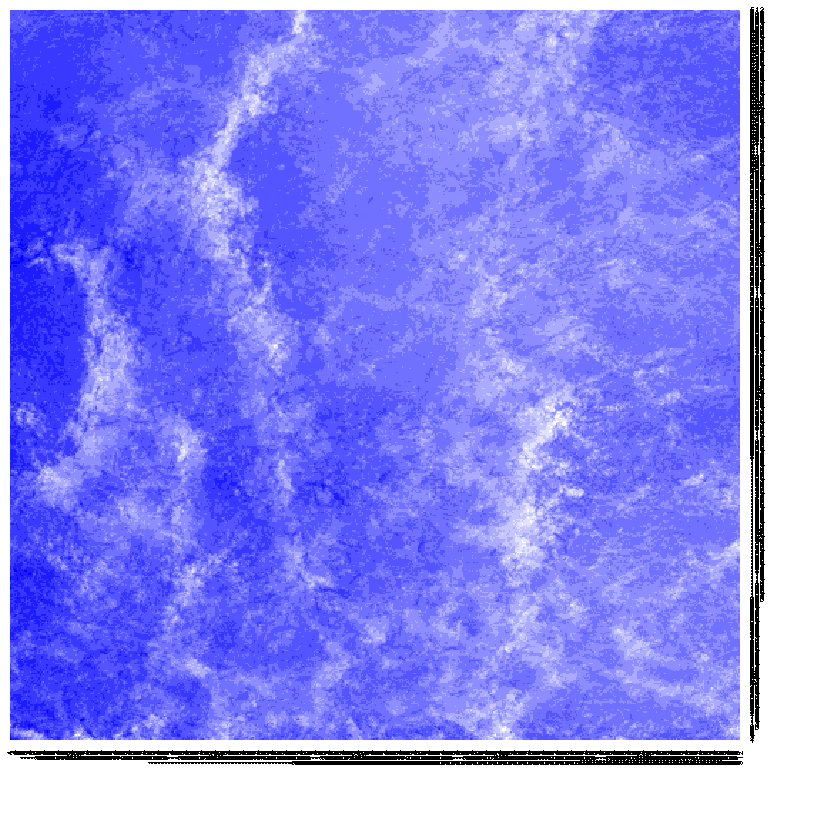

In [7]:
my.xy.split3 <- xy_splits(img, channels = "pan", do = "sum", cores = 1)
heatmap(my.xy.split3[[1]][["pan"]],Rowv = NA,Colv = NA,col=colorRampPalette(c("white","blue"))(10))

#### Median z-position for "mic" for each xy-position:

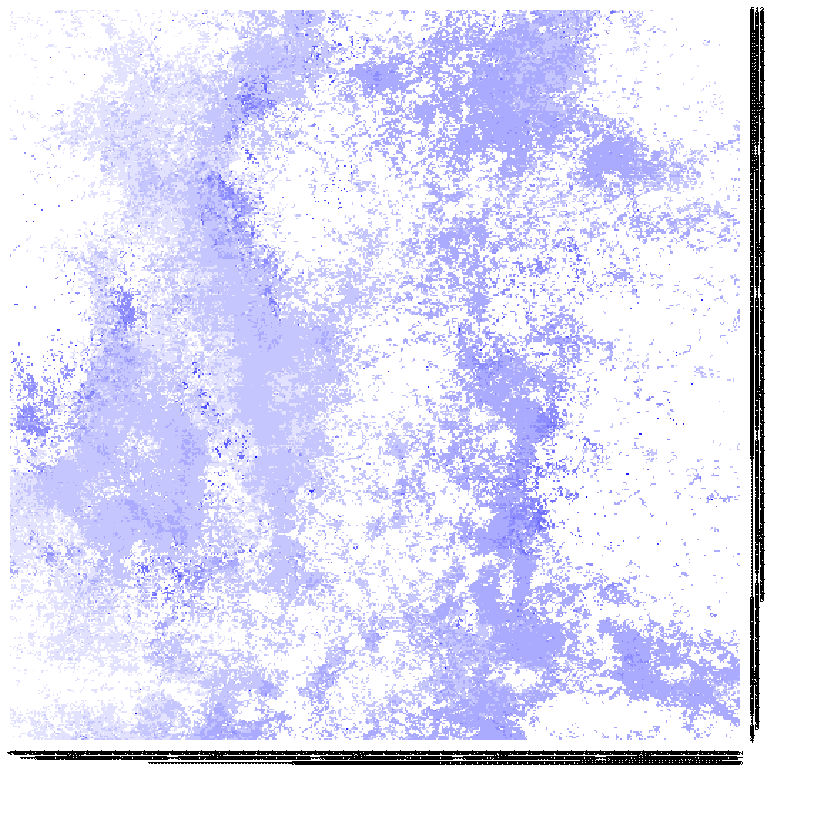

In [8]:
myfun <- function(x) median(which(x > 0))
my.xy.split4 <- xy_splits(img, channels = "mic", do = myfun, cores = 1)
heatmap(my.xy.split4[[1]][["mic"]],Rowv = NA,Colv = NA,col=colorRampPalette(c("white","blue"))(10))

#### Number of layers "mic" spans for each xy-position

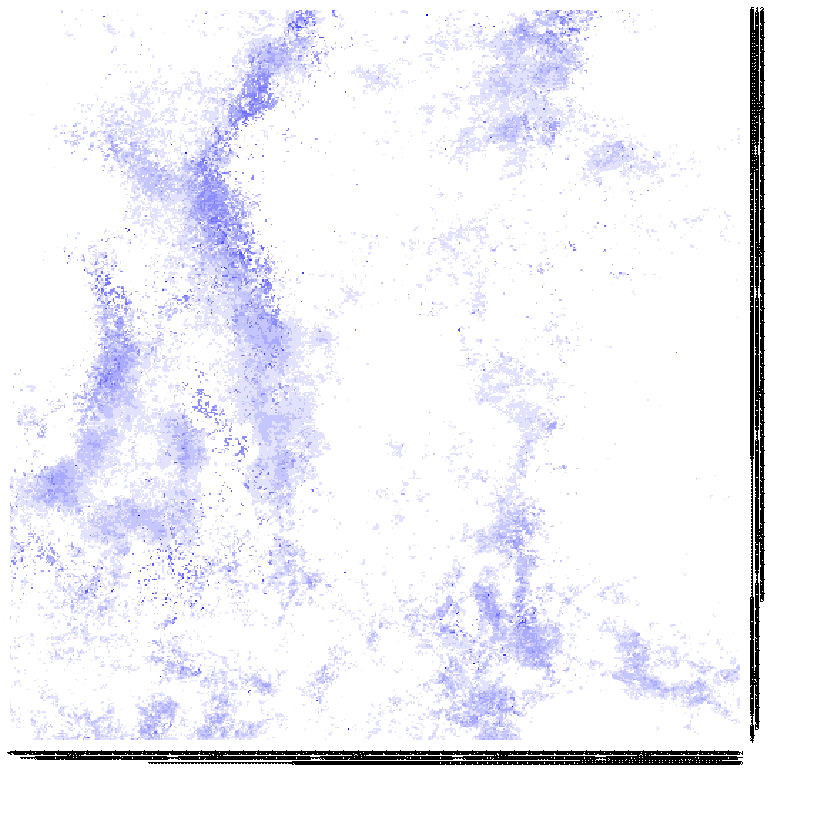

In [9]:
myfun <- function(x) {
  y <- max(which(x > 0)) - min(which(x > 0))
  if(is.infinite(y)) y <- 0
  return(y) }
my.xy.split5 <- xy_splits(img, channels = "mic", do = myfun, cores = 1)
heatmap(my.xy.split5[[1]][["mic"]],Rowv = NA,Colv = NA,col=colorRampPalette(c("white","blue"))(10))